In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import math


In [5]:
ini = pd.read_csv('../init_data.csv', header=0, index_col=0)
#general param
states_name = ini['State']
first_date = '2020/03/25'

t = 7
T = 14
P = 10
S = 51
P = 10
init_ratio = 0.6

# Unmet demand without allocation

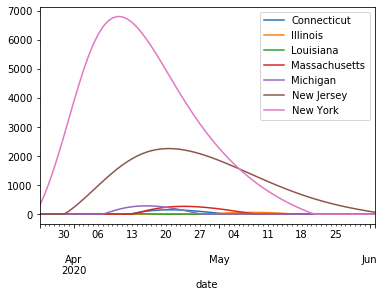

In [7]:

no_action = pd.read_csv('../IHME/0616_eval/Alaska.csv', header=0, index_col=0)['InvVen_mean']
no_action.index = pd.to_datetime(no_action.index)
no_action = no_action[no_action.index <= pd.to_datetime("2020/06/02")]
no_action[no_action>0] = 0

res = pd.DataFrame(index=no_action.index)

for i, name in enumerate(ini['State']):
    state_data = pd.read_csv('../IHME/0616_eval/' + name + '.csv', header=0, index_col=0)['InvVen_mean']
    state_data.index = pd.to_datetime(state_data.index)
    state_data = state_data[state_data.index <= pd.to_datetime("2020/06/02")]

    unmet = state_data - init_ratio * ini.loc[i, 'Available capacity']
    unmet[unmet < 0] = 0
    no_action = unmet + no_action
    if sum(unmet) > 0:
        res[name] = unmet

res.plot.line()

# demands

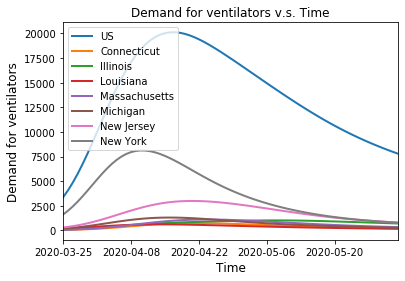

In [8]:
res = pd.read_csv('../IHME/0616_eval/Alaska.csv', header=0, index_col=0)['InvVen_mean']
res[res>0] = 0
res = res.to_frame()
res.columns = ['US']

for i, name in enumerate(ini['State']):
    state_data = pd.read_csv('../IHME/0616_eval/' + name + '.csv', header=0, index_col=0)['InvVen_mean']
    res['US'] += state_data
    unmet = state_data - init_ratio * ini.loc[i, 'Available capacity']
    unmet[unmet < 0] = 0
    if sum(unmet) > 0:
        res[name] = state_data
        
res.index = pd.to_datetime(res.index)

T = 14
for col in res.columns:
    plt.plot(res.index, res[col], label=col, linewidth=2)

labels = [res.index[i].date() for i in range(0, T*5, T)]
plt.xticks(ticks=res.index[range(0, T*5, T)], labels=labels)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Demand for ventilators', fontsize=12)
plt.title('Demand for ventilators v.s. Time')
plt.xlim(res.index[0], res.index[5*T - 1])

plt.legend()
plt.show()

In [6]:
# df = pd.read_csv('IHME_data/2020_06_16_eval/Alaska.csv', header=0, index_col=0)['InvVen_mean']
# df.index = pd.to_datetime(df.index)
# df = df[df.index <= pd.to_datetime("2020/06/16")]
# df[df>0] = 0
# for i, name in enumerate(ini['State']):
#     state_data = pd.read_csv('IHME_data/2020_06_16_eval/' + name + '.csv', header=0, index_col=0)['InvVen_mean']
#     unmet = state_data - 0.6 * ini.loc[i, 'Available capacity']
#     unmet[unmet < 0] = 0
#     df = unmet + df
# df.index = pd.to_datetime(df.index)
# df.plot.line()

# Without SNS

## deterministic model


In [7]:
dates = ["2020/04/07", "2020/04/21", "2020/05/05", "2020/05/19", "2020/06/02"]
sol = [{} for _ in range(5)]
for i, d in enumerate(dates):
    date = ('_').join(d.split('/'))
    sol_dt = pd.read_csv('results/without_SNS/deterministic/det_exp_' + date + '.csv', header=None)
    for r in range(sol_dt.shape[0]):
        l = sol_dt.iloc[r, 0].split('_')
        if  l[0] == 's':
            sol[i][int(l[1])] = sol_dt.iloc[r, 1]

In [8]:
stock = pd.DataFrame(index=list(ini['State'])+['SNS'])
stock['init'] = list(0.6*ini['Available capacity']) + [7200]
for i in range(5):
    stock[dates[i]] = [v for k,v in sorted(sol[i].items())]
stock 

,init,2020/04/07,2020/04/21,2020/05/05,2020/05/19,2020/06/02
Alaska,120.0,120,120,120,120,120
Alabama,806.4,800,320,320,320,320
Arkansas,300.0,1169,1289,1289,1229,1409
Arizona,900.0,1865,1865,1865,1865,1865
California,6621.6,3971,3971,3971,3971,3971
Colorado,360.0,734,640,734,734,754
Connecticut,600.0,600,600,600,556,360
Delaware,240.0,96,96,96,96,96
Florida,2400.0,1440,1920,1920,1920,1920
Georgia,603.6,1767,1653,1653,1276,1653


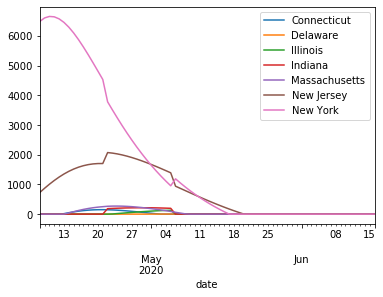

In [9]:
det = pd.read_csv('IHME_data/2020_06_16_eval/Alaska.csv', header=0, index_col=0)['InvVen_mean']
det.index = pd.to_datetime(det.index)
det = det[det.index <= pd.to_datetime("2020/06/16")]
det[det>0] = 0
res = pd.DataFrame(index=det.index)

for i, name in enumerate(ini['State']):
        state_data = pd.read_csv('IHME_data/2020_06_16_eval/' + name + '.csv', header=0, index_col=0)['InvVen_mean']
        state_data.index = pd.to_datetime(state_data.index)
        state_data = state_data[state_data.index <= pd.to_datetime("2020/06/16")]

        for time_slot in range(5):
            state_data.iloc[14 * time_slot : 14 * (time_slot + 1)] = state_data.iloc[14 * time_slot : 14 * (time_slot + 1)] - sol[time_slot][i]
        state_data[state_data < 0] = 0
        det = state_data + det

        if sum(state_data) > 0:
            res[name] = state_data
res.plot.line()

In [10]:
sum(0.6*ini['Available capacity']) 

42572.40000000001

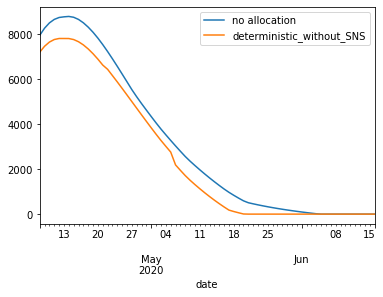

In [11]:
res = pd.DataFrame(index=det.index)
res['no allocation'] = no_action
res['deterministic_without_SNS'] = det
res.plot.line()

## Simple Recourse

In [12]:
sol = [{} for _ in range(5)]
for i, d in enumerate(dates):
    date = ('_').join(d.split('/'))
    sol_dt = pd.read_csv('results/without_SNS/SR/SR_' + date + '/sol.csv', header=None)
    for r in range(sol_dt.shape[0]):
        l = sol_dt.iloc[r, 0].split('(')
        if  l[0] == 's0':
            sol[i][int(l[1].split(')')[0])] = sol_dt.iloc[r, 1]

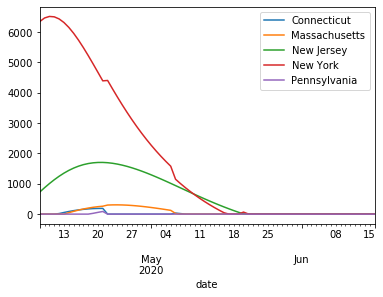

In [13]:
sr = pd.read_csv('IHME_data/2020_06_16_eval/Alaska.csv', header=0, index_col=0)['InvVen_mean']
sr.index = pd.to_datetime(sr.index)
sr[sr>0] = 0
res2 = pd.DataFrame(index=sr.index)

for i, name in enumerate(ini['State']):
        state_data = pd.read_csv('IHME_data/2020_06_16_eval/' + name + '.csv', header=0, index_col=0)['InvVen_mean']
        state_data.index = pd.to_datetime(state_data.index)
        for time_slot in range(5):
            state_data.iloc[14 * time_slot : 14 * (time_slot + 1)] = state_data.iloc[14 * time_slot : 14 * (time_slot + 1)] - sol[time_slot][i]
            
        state_data[state_data < 0] = 0
        if sum(state_data) > 0:
            res2[name] = state_data          
        sr = state_data + sr
        
res2.plot.line()

In [14]:
stock = pd.DataFrame(index=list(ini['State'])+['SNS'])
stock['init'] = list(0.6*ini['Available capacity']) + [7200]
for i in range(5):
    stock[dates[i]] = [v for k,v in sorted(sol[i].items())]
stock 

,init,2020/04/07,2020/04/21,2020/05/05,2020/05/19,2020/06/02
Alaska,120.0,222.529409,96.000000,96.000000,96.000000,96.000000
Alabama,806.4,776.245561,337.967210,590.114442,1496.380961,901.716249
Arkansas,300.0,663.645821,580.620001,489.564531,87.122618,214.554159
Arizona,900.0,1093.323186,828.577174,759.573358,769.996852,531.201779
California,6621.6,4751.002597,5075.377599,5420.052383,7037.597969,5635.661498
Colorado,360.0,508.752595,469.858827,643.569728,769.371209,899.624820
Connecticut,600.0,561.108702,828.669936,511.855008,674.105714,1030.946207
Delaware,240.0,135.328321,102.834249,235.305586,105.981721,681.368806
Florida,2400.0,2173.084531,2093.619462,2323.096738,1989.628439,2657.895395
Georgia,603.6,1293.935282,1445.912513,1259.146540,532.130468,373.128866


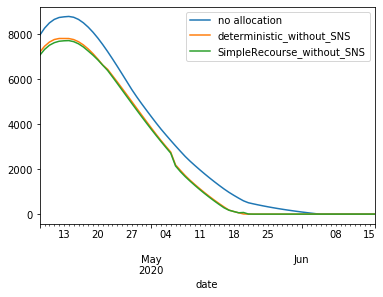

In [15]:
res = pd.DataFrame(index=det.index)
res['no allocation'] = no_action
res['deterministic_without_SNS'] = det
res['SimpleRecourse_without_SNS'] = sr
res.plot.line()

# With SNS

## deterministic

In [15]:
now = '1224_11_12'
sol = [{} for _ in range(P)]
for i in range(P):
    date = pd.to_datetime(first_date) + timedelta(i * t)
    sol_dt = pd.read_csv('det/{}/{}.csv'.format(now, date.strftime('%m%d')), header=0)
    for r in range(S):  
        sol[i][sol_dt.loc[r, 'State']] = sol_dt.loc[r, 'stock_self'] + sol_dt.loc[r, 'stock_sns'] + sum(eval(sol_dt.loc[r, 'stock_nb']))

In [17]:
stock = pd.DataFrame(index=list(ini['State']))
stock['init'] = list(init_ratio*ini['Available capacity']) 
for i in range(P):
    date = pd.to_datetime(first_date) + timedelta(i * t)

    stock[date.strftime('%m%d')] = [sol[i][k] for k in list(ini['State'])]
stock 

,init,0325,0401,0408,0415,0422,0429,0506,0513,0520,0527
Alaska,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0
Alabama,806.4,806.0,1559.0,806.0,798.0,806.0,806.0,806.0,806.0,806.0,806.0
Arkansas,300.0,300.0,248.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
Arizona,900.0,900.0,720.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0
California,6621.6,6622.0,6622.0,6622.0,6622.0,6622.0,6622.0,6622.0,6622.0,6622.0,6622.0
Colorado,360.0,360.0,813.0,360.0,354.0,360.0,360.0,360.0,360.0,360.0,360.0
Connecticut,600.0,480.0,394.0,501.0,985.0,856.0,782.0,583.0,620.0,600.0,600.0
Delaware,240.0,192.0,154.0,123.0,73.0,50.0,73.0,85.0,64.0,76.0,68.0
Florida,2400.0,2400.0,1817.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0,2400.0
Georgia,603.6,604.0,738.0,604.0,612.0,604.0,604.0,604.0,604.0,604.0,604.0


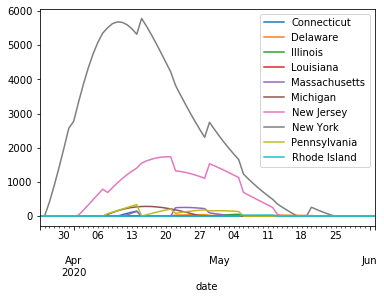

In [19]:
det1 = pd.read_csv('../IHME/0616_eval/Alaska.csv', header=0, index_col=0)['InvVen_mean']
det1.index = pd.to_datetime(det1.index)
det1 = det1[det1.index <= pd.to_datetime("2020/06/02")]
det1[det1>0] = 0
res = pd.DataFrame(index=det1.index)

for i, name in enumerate(ini['State']):
        state_data = pd.read_csv('../IHME/0616_eval/' + name + '.csv', header=0, index_col=0)['InvVen_mean']
        state_data.index = pd.to_datetime(state_data.index)
        state_data = state_data[state_data.index <= pd.to_datetime("2020/06/02")]

        for time_slot in range(P):
            state_data.iloc[t * time_slot : t * (time_slot + 1)] = state_data.iloc[t * time_slot : t * (time_slot + 1)] - sol[time_slot][name]
        state_data[state_data < 0] = 0
        det1 = state_data + det1

        if sum(state_data) > 0:
            res[name] = state_data
res.plot.line()

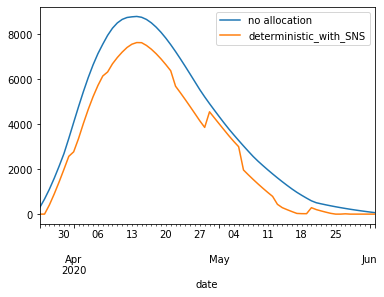

In [22]:
res = pd.DataFrame(index=det1.index)
res['no allocation'] = no_action
res['deterministic_with_SNS'] = det1
#res['deterministic_without_SNS'] = det
res.plot.line()
sum(res)

In [48]:
def performance(model, now):
    sol = [{} for _ in range(P)]
    for i in range(P):
        date = pd.to_datetime(first_date) + timedelta(i * t)
        sol_dt = pd.read_csv('{}/{}/{}.csv'.format(model, now, date.strftime('%m%d')), header=0)
        for r in range(S):  
            sol[i][sol_dt.loc[r, 'State']] = sol_dt.loc[r, 'stock_self'] + sol_dt.loc[r, 'stock_sns'] + sum(eval(sol_dt.loc[r, 'stock_nb']))
    stock = pd.DataFrame(index=list(ini['State']))
    stock['init'] = list(init_ratio*ini['Available capacity']) 
    for i in range(P):
        date = pd.to_datetime(first_date) + timedelta(i * t)

        stock[date.strftime('%m%d')] = [sol[i][k] for k in list(ini['State'])]
    print(stock)
    model_eval = pd.read_csv('../IHME/0616_eval/Alaska.csv', header=0, index_col=0)['InvVen_mean']
    model_eval.index = pd.to_datetime(model_eval.index)
    model_eval = model_eval[model_eval.index <= pd.to_datetime("2020/06/02")]
    model_eval[model_eval>0] = 0
    res = pd.DataFrame(index=model_eval.index)

    for i, name in enumerate(ini['State']):
        state_data = pd.read_csv('../IHME/0616_eval/' + name + '.csv', header=0, index_col=0)['InvVen_mean']
        state_data.index = pd.to_datetime(state_data.index)
        state_data = state_data[state_data.index <= pd.to_datetime("2020/06/02")]

        for time_slot in range(P):
            state_data.iloc[t * time_slot : t * (time_slot + 1)] = state_data.iloc[t * time_slot : t * (time_slot + 1)] - sol[time_slot][name]
        state_data[state_data < 0] = 0
        model_eval = state_data + model_eval

        if sum(state_data) > 0:
            res[name] = state_data
    res.plot.line()

    res_all = pd.DataFrame(index=model_eval.index)
    res_all['no allocation'] = no_action
    res_all[model] = model_eval
    res_all.plot.line()
    print('Total unmet for {} is {}'.format(model, sum(model_eval)))

                        init    0325    0401    0408    0415    0422    0429  \
Alaska                 120.0   120.0   120.0   120.0   120.0   120.0   120.0   
Alabama                806.4   806.0  1559.0   806.0   798.0   806.0   806.0   
Arkansas               300.0   300.0   248.0   300.0   300.0   300.0   300.0   
Arizona                900.0   900.0   720.0   900.0   900.0   900.0   900.0   
California            6621.6  6622.0  6622.0  6622.0  6622.0  6622.0  6622.0   
Colorado               360.0   360.0   813.0   360.0   354.0   360.0   360.0   
Connecticut            600.0   480.0   394.0   501.0   985.0   856.0   782.0   
Delaware               240.0   192.0   154.0   123.0    73.0    50.0    73.0   
Florida               2400.0  2400.0  1817.0  2400.0  2400.0  2400.0  2400.0   
Georgia                603.6   604.0   738.0   604.0   612.0   604.0   604.0   
Hawaii                 320.4   320.0   320.0   320.0   320.0   320.0   320.0   
Iowa                   168.0   168.0   1

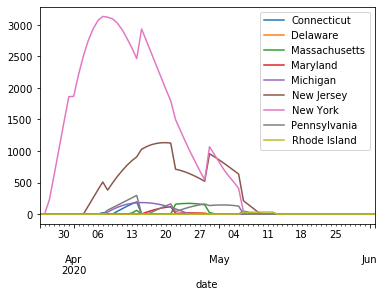

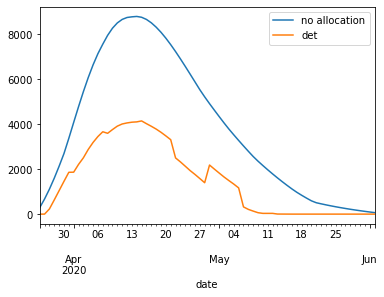

In [65]:
performance('det', '1224_11_12')

                        init  0325  0401  0408  0415  0422  0429  0506  0513  \
Alaska                 120.0   120   120   120   120   120   120   120   120   
Alabama                806.4   806  2700   749   683   678   806   768   806   
Arkansas               300.0   295   154   300   285   293   299   299   299   
Arizona                900.0   900   733   900   900   900   900   900   900   
California            6621.6  6622  6622  6622  6622  6622  6622  6622  6622   
Colorado               360.0   360  1085   348   318   356   439   361   361   
Connecticut            600.0   480   852  1557  1900  1540  1550   818   754   
Delaware               240.0   236   150   152   118   181   240   174   240   
Florida               2400.0  2400  1819  2137  2155  2310  2401  2362  2401   
Georgia                603.6  1606  1180  1329  1412  1062  1053   843   604   
Hawaii                 320.4   320   320   320   320   320   320   320   320   
Iowa                   168.0   168   243

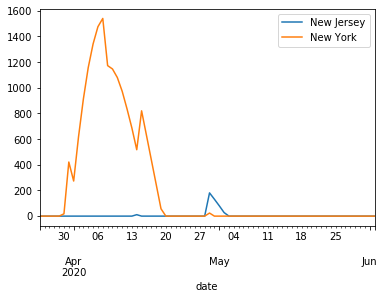

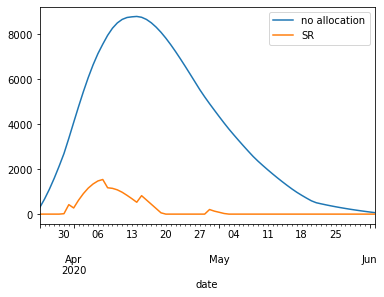

In [66]:
performance('SR', '1227_20_10')

                        init  0325  0401  0408  0415  0422  0429  0506  0513  \
Alaska                 120.0   120   120   120   120   120   120   120   120   
Alabama                806.4   806  2824   752   696   666   806   775   806   
Arkansas               300.0   294   220   300   298   294   301   301   301   
Arizona                900.0   900   755   900   900   900   900   900   900   
California            6621.6  6622  6622  6622  6622  6622  6622  6622  6622   
Colorado               360.0   360  1097   354   339   348   439   360   360   
Connecticut            600.0   480   772  1613  1942  1551  1550   830   754   
Delaware               240.0   192   303   154   117   182   240   172   240   
Florida               2400.0  2400  1920  2221  2140  2294  2400  2369  2400   
Georgia                603.6  1247  1049  1152  1380  1097  1053   796   604   
Hawaii                 320.4   320   320   320   320   320   320   320   320   
Iowa                   168.0   168   305

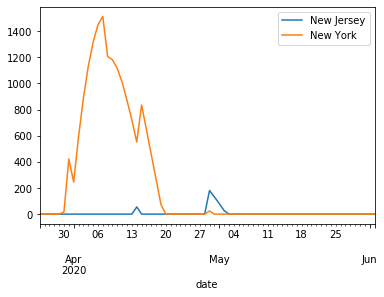

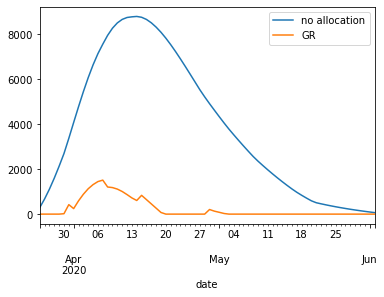

In [67]:
performance('GR', '1227_20_10')

                        init  0325  0401  0408  0415  0422  0429  0506  0513  \
Alaska                 120.0   120   120   120   120   120   120   120   120   
Alabama                806.4   806  2808   785   729   671   805   771   805   
Arkansas               300.0   299   181   300   296   289   299   299   299   
Arizona                900.0   900   723   900   900   894   900   900   900   
California            6621.6  6622  6622  6622  6622  6622  6622  6622  6622   
Colorado               360.0   360  1157   360   340   365   438   361   361   
Connecticut            600.0   480   826  1598  1985  1487  1550   820   753   
Delaware               240.0   192   138   130   120   205   240   192   240   
Florida               2400.0  2400  1920  2243  2072  2293  2400  2365  2400   
Georgia                603.6  1177  1094  1124  1391  1074  1052   812   604   
Hawaii                 320.4   320   320   320   320   320   320   320   320   
Iowa                   168.0   168   211

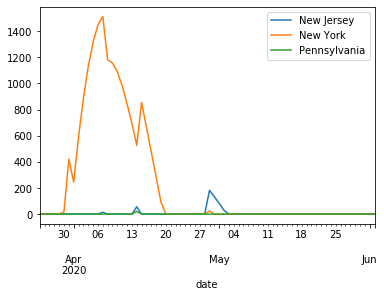

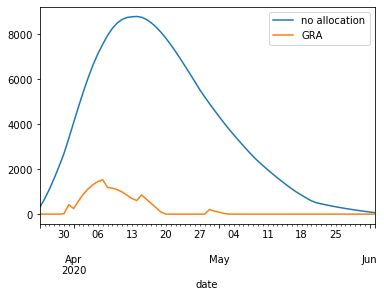

In [68]:
performance('GRA', '1227_22_38')

## Simple Recourse

In [20]:
now = '1227_20_10'
sol = [{} for _ in range(P)]
for i in range(P):
    date = pd.to_datetime(first_date) + timedelta(i * t)
    sol_dt = pd.read_csv('SR/{}/{}.csv'.format(now, date.strftime('%m%d')), header=0)
    for r in range(S):  
        sol[i][sol_dt.loc[r, 'State']] = sol_dt.loc[r, 'stock_self'] + sol_dt.loc[r, 'stock_sns'] + sum(eval(sol_dt.loc[r, 'stock_nb']))

In [21]:
stock = pd.DataFrame(index=list(ini['State'])+['SNS'])
stock['init'] = list(0.6*ini['Available capacity']) + [7200]
for i in range(5):
    stock[dates[i]] = [v for k,v in sorted(sol[i].items())]
stock 

,init,2020/04/07,2020/04/21,2020/05/05,2020/05/19,2020/06/02
Alaska,120.0,263.201645,96.000000,96.000000,96.000000,96.000000
Alabama,806.4,852.772173,1002.727188,603.468244,683.668425,1543.347844
Arkansas,300.0,641.465065,237.909943,55.756156,97.499711,216.815427
Arizona,900.0,936.086179,645.067767,232.932339,1017.625388,520.112087
California,6621.6,3785.849086,4170.743498,5615.530747,7034.901068,7059.841900
Colorado,360.0,422.062409,588.548898,767.752129,522.957051,599.863336
Connecticut,600.0,1847.000000,1586.833440,956.651899,710.441605,867.588774
Delaware,240.0,149.835074,451.917688,196.596750,96.000000,702.859293
Florida,2400.0,2186.642744,1474.985809,2551.835845,2652.998529,2015.638551
Georgia,603.6,1399.241579,1550.271023,1040.243410,568.477139,369.292891


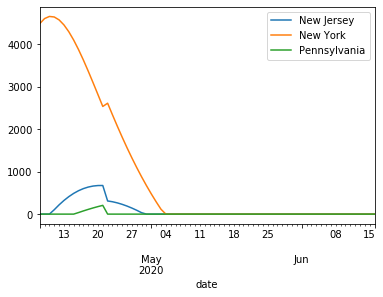

In [22]:
sr1 = pd.read_csv('IHME_data/2020_06_16_eval/Alaska.csv', header=0, index_col=0)['InvVen_mean']
sr1.index = pd.to_datetime(sr1.index)
sr1[sr1>0] = 0
res2 = pd.DataFrame(index=sr1.index)

for i, name in enumerate(ini['State']):
    state_data = pd.read_csv('IHME_data/2020_06_16_eval/' + name + '.csv', header=0, index_col=0)['InvVen_mean']
    state_data.index = pd.to_datetime(state_data.index)
    for time_slot in range(5):
        state_data.iloc[14 * time_slot : 14 * (time_slot + 1)] = state_data.iloc[14 * time_slot : 14 * (time_slot + 1)] - sol[time_slot][i]

    state_data[state_data < 0] = 0
    if sum(state_data) > 0:
        res2[name] = state_data
        
    sr1 = state_data + sr1

res2.plot.line()

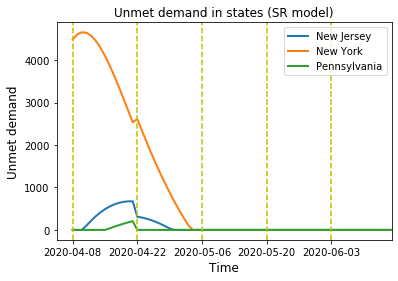

In [23]:
fig, ax1 = plt.subplots()

T = 14
for col in res2.columns:
    ax1.plot(res2.index, res2[col], label=col, linewidth=2)
for i in range(5):  
    ax1.axvline(x=res2.index[T*i], color='y', linestyle='--')
    

labels = [res2.index[i].date() for i in range(0, T*5, T)]
#ax1.set_xticks(ticks=res.index[range(0, T*5, T)], labels=labels)
ax1.set_xticks(res2.index[range(0, T*5, T)])
ax1.set_xticklabels(labels)
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Unmet demand', fontsize=12)
ax1.set_title('Unmet demand in states (SR model)')
ax1.set_xlim(right=res2.index[5*T - 1])

ax1.legend()
plt.show()

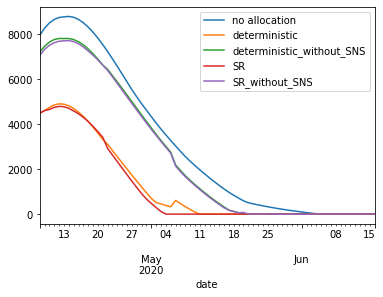

In [24]:
res = pd.DataFrame(index=det.index)
res['no allocation'] = no_action
res['deterministic'] = det1
res['deterministic_without_SNS'] = det
res['SR'] = sr1
res['SR_without_SNS'] = sr
res.plot.line()

## General Recourse

In [25]:
sol = [{} for _ in range(5)]
for i, d in enumerate(dates):
    date = ('_').join(d.split('/'))
    sol_dt = pd.read_csv('results/GR/GR_' + date + '/sol.csv', header=None)
    for r in range(sol_dt.shape[0]):
        l = sol_dt.iloc[r, 0].split('(')
        if  l[0] == 's0':
            sol[i][int(l[1].split(')')[0])] = sol_dt.iloc[r, 1]

### The second stage is with new allocation

In [26]:
# Generate the subproblem for GR/GR_adaptive
def generate_sub(name, sol):
    ini_with_SNS = ini.copy()
    ini_with_SNS.loc[51, 'StateCode'] = 'SNS'
    ini_with_SNS.loc[51, 'Available capacity'] = 12000
    ini_with_SNS.loc[51, 'nb_idx'] = str([i for i in range(51)])

    states_name = ini['State']
    S = 51
    a = [int(i) for i in 0.6 * ini_with_SNS['Available capacity']] 
    #write GR subproblem
    prediction = {}
    for d in range(5):
        date = ('_').join(dates[d].split('/'))
        T = 14
        tr = 8
        for i in range(S):
            prediction[states_name[i]] = pd.read_csv('IHME_data/2020_06_16_eval/' + states_name[i] + '.csv', header=0, index_col=0)  
        
        base_dir = os.getcwd()
        prob_name = '{}_sub_{}'.format(name, date)

        f_path = os.path.join(base_dir, 'results/{}/{}.lp'.format(name, prob_name))
        f = open(f_path, 'w')

        f.write('Minimize \n')
        f.write(' obj: ')
        for j in range(S):
            for t in range(tr, T + 1):
                if not (t == tr and j == 0): 
                    f.write(' +')
                f.write(' delta_{}_{}'.format(j, t))
        f.write(' \n')

        f.write('subject To \n')
        for j in range(S):
            nbs = eval(ini.loc[j, 'nb_idx'])
            f.write(' s_{}_r - '.format(j))
            f.write(' - '.join(['y_{}_{}'.format(i, j) for i in nbs]))
            f.write(' - y_51_{}'.format(j))
            f.write(' + ')
            f.write(' + '.join(['y_{}_{}'.format(j, i) for i in nbs]))
            f.write(' = {}\n'.format(int(sol[d][j])))
            
        f.write(' s_51_r +')
        f.write(' + '.join(['y_51_{}'.format(i) for i in range(S)]))
        f.write(' = {}\n'.format(sol[d][51]))

        for j in range(S):
            for t in range(tr, T + 1):
                dmd = math.ceil(prediction[states_name[j]].iloc[14 * d + t - 1, 1])
                f.write(' delta_{}_{} + s_{}_r>= {}\n'.format(j, t, j, dmd))

        f.write('Bounds \n')
        for j in range(S):
            G = math.ceil(min(sol[d][j], max(prediction[states_name[j]]['InvVen_mean'][14 * d + 7: 14 * d + 14])))
            f.write(' {} <= s_{}_r \n'.format(G, j))
        f.write(' 0 <= s_51_r \n')

        for i in range(S + 1):
            nbs = eval(ini_with_SNS.loc[i, 'nb_idx'])
            for j in nbs:
                f.write(' 0 <= y_{}_{} <= {}\n'.format(i, j, math.ceil(0.2 * a[i])))

        for j in range(S):
            for t in range(tr, T + 1):
                f.write(' 0 <= delta_{}_{}\n'.format(j, t))

        f.write('End\n')

In [27]:
sol_sub = [{} for _ in range(5)]
for i, d in enumerate(dates):
    date = ('_').join(d.split('/'))
    sol_dt = pd.read_csv('results/GR/GR_sub_' + date + '.csv', header=None)
    for r in range(sol_dt.shape[0]):
        l = sol_dt.iloc[r, 0].split('_')
        if  l[0] == 's':
            sol_sub[i][int(l[1])] = sol_dt.iloc[r, 1]

In [28]:
stock = pd.DataFrame(index=list(ini['State'])+['SNS'])
stock['init'] = list(0.6*ini['Available capacity']) + [7200]
for i in range(5):
    stock[pd.to_datetime(dates[i])] = [v for k,v in sorted(sol[i].items())]
    stock[pd.to_datetime(dates[i]) + timedelta(days=7)] = [v for k,v in sorted(sol_sub[i].items())]
stock 

,init,2020-04-07 00:00:00,2020-04-14 00:00:00,2020-04-21 00:00:00,2020-04-28 00:00:00,2020-05-05 00:00:00,2020-05-12 00:00:00,2020-05-19 00:00:00,2020-05-26 00:00:00,2020-06-02 00:00:00,2020-06-09 00:00:00
Alaska,120.0,262.530712,238.000000,249.669833,225.000000,262.392044,262.000000,263.190600,263.000000,262.913751,262.000000
Alabama,806.4,926.007542,602.000000,413.446168,900.000000,308.875161,674.000000,907.238912,745.000000,704.365243,1070.000000
Arkansas,300.0,1382.718988,1202.000000,372.348964,360.000000,100.624788,1353.000000,200.420785,1237.000000,93.777710,1070.000000
Arizona,900.0,1754.037983,1214.000000,1059.022141,159.000000,239.164531,1900.000000,1047.828781,327.000000,885.844283,777.000000
California,6621.6,2739.814848,3180.000000,5440.241724,4359.000000,5459.341017,4198.000000,5034.503561,5278.000000,5655.696271,4394.000000
Colorado,360.0,326.375158,720.000000,515.045992,593.000000,632.530449,815.000000,499.133649,858.000000,814.947750,454.000000
Connecticut,600.0,1447.234879,1327.000000,1622.280512,1502.000000,839.039600,479.000000,716.975508,356.000000,265.478561,480.000000
Delaware,240.0,96.000000,125.000000,417.273415,321.000000,256.242271,160.000000,96.000000,369.000000,367.604953,223.000000
Florida,2400.0,2280.998726,1800.000000,2515.747707,2035.000000,2655.415195,1695.000000,1608.619456,1608.000000,2667.887115,1707.000000
Georgia,603.6,1011.398440,1805.000000,1121.496777,758.000000,909.826209,1299.000000,1202.668095,960.000000,366.555543,877.000000


New Jersey         6876.373243
New Jersey_sub     3187.763682
New York          70453.457661
New York_sub      53022.672702
dtype: float64


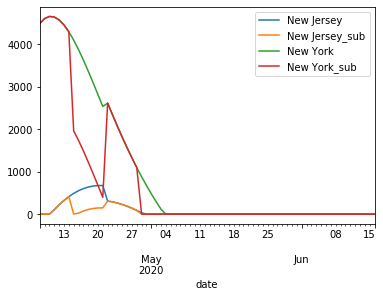

In [29]:
gr = pd.read_csv('IHME_data/2020_06_16_eval/Alaska.csv', header=0, index_col=0)['InvVen_mean']
gr.index = pd.to_datetime(gr.index)
gr[gr>0] = 0
gr_sub = gr.copy()
res3 = pd.DataFrame(index=gr.index)

for i, name in enumerate(ini['State']):
    state_data = pd.read_csv('IHME_data/2020_06_16_eval/' + name + '.csv', header=0, index_col=0)['InvVen_mean']
    state_data.index = pd.to_datetime(state_data.index)
    state_data_sub = state_data.copy()
    for time_slot in range(5):
        state_data.iloc[14 * time_slot : 14 * (time_slot + 1)] = state_data.iloc[14 * time_slot : 14 * (time_slot + 1)] - sol[time_slot][i]

        state_data_sub.iloc[14 * time_slot : 14 * time_slot + 7] = state_data_sub.iloc[14 * time_slot : 14 * time_slot + 8] - sol[time_slot][i]
        state_data_sub.iloc[14 * time_slot + 7 : 14 * time_slot + 14] = state_data_sub.iloc[14 * time_slot + 7: 14 * time_slot + 14] - sol_sub[time_slot][i]

    state_data[state_data < 0] = 0
    state_data_sub[state_data_sub < 0] = 0
    if sum(state_data) > 0:
        res3[name] = state_data
        res3[name + '_sub'] = state_data_sub
             
    gr = state_data + gr
    gr_sub = state_data_sub + gr_sub

print(res3.sum())
res3.plot.line()

GR: 77329.83090440615, GR_sub=56210.436383837085


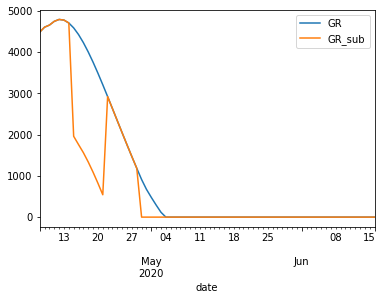

In [30]:
res = pd.DataFrame(index=gr.index)
res['GR'] = gr
res['GR_sub'] = gr_sub
print('GR: {}, GR_sub={}'.format(gr.sum(), gr_sub.sum()))
res.plot.line()

## GR Adaptive

In [31]:
dates = ["2020/04/07", "2020/04/21", "2020/05/05", "2020/05/19", "2020/06/02"]
sol = [{} for _ in range(5)]
for i, d in enumerate(dates):
    date = ('_').join(d.split('/'))
    sol_dt = pd.read_csv('results/GR_adaptive/GR_adaptive_' + date + '/sol.csv', header=None)
    for r in range(sol_dt.shape[0]):
        l = sol_dt.iloc[r, 0].split('(')
        if  l[0] == 's0':
            sol[i][int(l[1].split(')')[0])] = sol_dt.iloc[r, 1]

In [32]:
#generate_sub('GR_adaptive', sol)

In [33]:
sol_sub = [{} for _ in range(5)]
for i, d in enumerate(dates):
    date = ('_').join(d.split('/'))
    sol_dt = pd.read_csv('results/GR_adaptive/GR_adaptive_sub_' + date + '.csv', header=None)
    for r in range(sol_dt.shape[0]):
        l = sol_dt.iloc[r, 0].split('_')
        if  l[0] == 's':
            sol_sub[i][int(l[1])] = sol_dt.iloc[r, 1]

In [34]:
stock = pd.DataFrame(index=list(ini['State'])+['SNS'])
stock['init'] = list(0.6*ini['Available capacity']) + [7200]
for i in range(5):
    stock[pd.to_datetime(dates[i])] = [v for k,v in sorted(sol[i].items())]
    stock[pd.to_datetime(dates[i]) + timedelta(days=7)] = [v for k,v in sorted(sol_sub[i].items())]
stock 

,init,2020-04-07 00:00:00,2020-04-14 00:00:00,2020-04-21 00:00:00,2020-04-28 00:00:00,2020-05-05 00:00:00,2020-05-12 00:00:00,2020-05-19 00:00:00,2020-05-26 00:00:00,2020-06-02 00:00:00,2020-06-09 00:00:00
Alaska,120.0,246.490388,246.000000,241.806203,217.00000,261.087224,261.000000,254.286228,254.000000,260.195046,260.000000
Alabama,806.4,457.855574,734.000000,826.041305,502.00000,874.821532,712.000000,1328.178896,1004.000000,698.781744,1064.000000
Arkansas,300.0,256.702972,1221.000000,927.449641,747.00000,118.456366,1251.000000,95.944918,1192.000000,78.091468,1055.000000
Arizona,900.0,449.953809,2110.000000,1067.225279,527.00000,252.089710,1812.000000,653.493768,812.000000,282.303682,1943.000000
California,6621.6,5366.709967,4206.000000,5331.813412,4250.00000,5670.867115,3084.000000,5392.566838,5552.000000,5580.986246,4319.000000
Colorado,360.0,324.509636,466.000000,765.112128,621.00000,569.916409,707.000000,866.341530,506.000000,804.985263,444.000000
Connecticut,600.0,1415.766566,1295.000000,2077.162534,1957.00000,893.109403,533.000000,718.751677,478.000000,892.119998,652.000000
Delaware,240.0,113.495202,142.000000,248.653806,152.00000,241.951103,145.000000,202.329337,427.000000,741.681658,645.000000
Florida,2400.0,2201.632969,1721.000000,2474.679694,1994.00000,2050.504931,2050.000000,2012.948458,1532.000000,2661.963930,1701.000000
Georgia,603.6,1552.304726,1189.000000,943.009889,1616.00000,958.426717,716.000000,374.865246,1047.000000,374.150596,1141.000000


New Jersey        10711.069248
New Jersey_sub     5140.621782
New York          66467.954874
New York_sub      50519.357482
dtype: float64


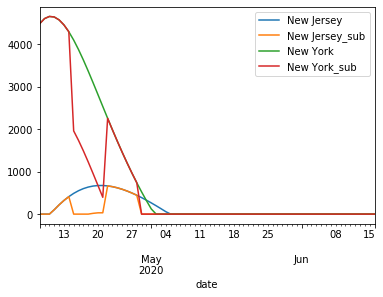

In [35]:
gr_adaptive = pd.read_csv('IHME_data/2020_06_16_eval/Alaska.csv', header=0, index_col=0)['InvVen_mean']
gr_adaptive.index = pd.to_datetime(gr_adaptive.index)
gr_adaptive[gr_adaptive>0] = 0
gr_adaptive_sub = gr_adaptive.copy()
res3 = pd.DataFrame(index=gr_adaptive.index)

for i, name in enumerate(ini['State']):
    state_data = pd.read_csv('IHME_data/2020_06_16_eval/' + name + '.csv', header=0, index_col=0)['InvVen_mean']
    state_data.index = pd.to_datetime(state_data.index)
    state_data_sub = state_data.copy()
    for time_slot in range(5):
        state_data.iloc[14 * time_slot : 14 * (time_slot + 1)] = state_data.iloc[14 * time_slot : 14 * (time_slot + 1)] - sol[time_slot][i]

        state_data_sub.iloc[14 * time_slot : 14 * time_slot + 7] = state_data_sub.iloc[14 * time_slot : 14 * time_slot + 8] - sol[time_slot][i]
        state_data_sub.iloc[14 * time_slot + 7 : 14 * time_slot + 14] = state_data_sub.iloc[14 * time_slot + 7: 14 * time_slot + 14] - sol_sub[time_slot][i]
    state_data[state_data < 0] = 0
    state_data_sub[state_data_sub < 0] = 0
    if sum(state_data) > 0:
        res3[name] = state_data
        res3[name + '_sub'] = state_data_sub
        
    gr_adaptive = state_data + gr_adaptive
    gr_adaptive_sub = state_data_sub + gr_adaptive_sub

print(res3.sum())
res3.plot.line()

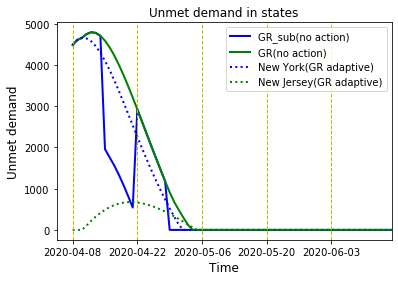

In [36]:
fig, ax1 = plt.subplots()

c = ['b', 'g', 'r', 'c', 'm', 'coral', 'khaki']

T = 14

for i, col in enumerate(res.columns[::-1]):
    ax1.plot(res.index, res[col], label=col + '(no action)', color=c[i], linewidth=2)
for i, col in enumerate(['New York', 'New Jersey']):
    ax1.plot(res3.index, res3[col], label=col + '(GR adaptive)', color=c[i], linewidth=2, linestyle='dotted')
for i in range(5):  
    ax1.axvline(x=res3.index[T*i], color='y', linestyle='--', linewidth=1)
    

labels = [res3.index[i].date() for i in range(0, T*5, T)]
#ax1.set_xticks(ticks=res.index[range(0, T*5, T)], labels=labels)
ax1.set_xticks(res3.index[range(0, T*5, T)])
ax1.set_xticklabels(labels)
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Unmet demand', fontsize=12)
ax1.set_title('Unmet demand in states')
ax1.set_xlim(right=res3.index[5*T - 1])

ax1.legend()
plt.show()

In [37]:
# res = pd.DataFrame(index=gr.index)
# res['no allocation'] = no_action
# res['deterministic w/o SNS'] = det
# res['SR w/o SNS'] = sr
# res['deterministic'] = det1
# res['SR'] = sr1
# res['GR'] = gr
# res['GR_adaptive'] = gr_adaptive


# T = 14
# for col in res.columns:
#     plt.plot(res.index, res[col], label=col)
# for i in range(5):  
#     plt.axvline(x=res.index[T*i], color='k', linestyle='--')

# labels = [res.index[i].date() for i in range(0, T*5, T)]
# plt.xticks(ticks=res.index[range(0, T*5, T)], labels=labels)
# plt.xlabel('Time', fontsize=12)
# plt.ylabel('Unmet demand', fontsize=12)
# plt.title('Unmet demand v.s. Time')

# plt.legend()
# plt.show()

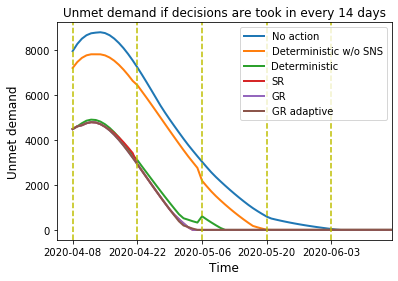

In [38]:

res = pd.DataFrame(index=gr.index)
res['No action'] = no_action
res['Deterministic w/o SNS'] = det
# res['SR w/o SNS'] = sr
res['Deterministic'] = det1
res['SR'] = sr1
res['GR'] = gr
res['GR adaptive'] = gr_adaptive
fig, ax1 = plt.subplots()

# ax2 = ax1.twinx()
# ax2.plot(res.index, demand, linestyle='-.', color='k')
#ax1.plot(res.index, demand, linestyle='-.', color='k')
T = 14
for col in res.columns:
    ax1.plot(res.index, res[col], label=col, linewidth=2)
for i in range(5):  
    ax1.axvline(x=res.index[T*i], color='y', linestyle='--')
    

labels = [res.index[i].date() for i in range(0, T*5, T)]
#ax1.set_xticks(ticks=res.index[range(0, T*5, T)], labels=labels)
ax1.set_xticks(res.index[range(0, T*5, T)])
ax1.set_xticklabels(labels)
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Unmet demand', fontsize=12)
ax1.set_title('Unmet demand if decisions are took in every 14 days')
ax1.set_xlim(right=res.index[5*T - 1])

ax1.legend()
plt.show()

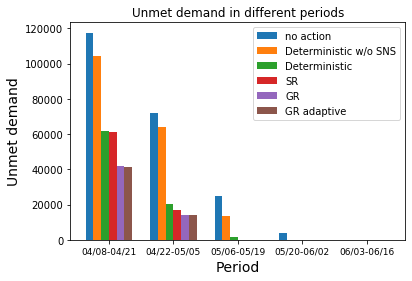

In [59]:

T=14
res = pd.DataFrame(index=no_action.index)
res['no action'] = no_action
res['Deterministic w/o SNS'] = det
# res['SR w/o SNS'] = sr
res['Deterministic'] = det1
res['SR'] = sr1
res['GR'] = gr_sub
res['GR adaptive'] = gr_adaptive_sub

no_action_in_14 = [sum(no_action[i*T: (i+1)*T]) for i in range(5)]

#labels = ['{}\n-{}'.format(res.index[i].date(), (res.index[i] + timedelta(days=13)).date()) for i in range(0, T*5, T)]
labels = ['04/08-04/21', '04/22-05/05' ,'05/06-05/19', '05/20-06/02' ,'06/03-06/16']
x = np.arange(len(labels))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots()
rects = {}
for i, cat_name in enumerate(res.columns):
    rects[i] = ax.bar(x - 2.5 * width + i*width, [sum(res[cat_name][i*T: (i+1)*T]) for i in range(5)], width, label=cat_name)

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_xlabel('Period', fontsize=14)
ax.set_ylabel('Unmet demand', fontsize=14)
ax.set_title('Unmet demand in different periods')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=9)
ax.legend()

plt.show()

In [58]:
res.index[0].date().day 

8

In [40]:
sum(no_action[0:14])-sum(det1[0:14])

55631.47885217993

In [52]:
temp = {}
for i, cat_name in enumerate(res.columns):
    print(cat_name + ' & ' + '& '.join([str(int(sum(res[cat_name][i*T: (i+1)*T]))) for i in range(5)]))
    temp[cat_name] = [int(sum(res[cat_name][i*T: (i+1)*T])) for i in range(5)]


no action & 117467& 72119& 24640& 4039& 56
Deterministic w/o SNS & 104542& 64078& 13291& 5& 0
Deterministic & 61836& 20519& 1701& 0& 0
SR & 61266& 16805& 0& 0& 0
GR & 41870& 14340& 0& 0& 0
GR adaptive & 41319& 14340& 0& 0& 0


In [75]:
for i, cat_name in enumerate(res.columns):
    if cat_name == 'no action':
        continue
    l = [round((temp['no action'][i] - temp[cat_name][i])/temp['no action'][i] * 100, 2) for i in range(5)]
    print(cat_name + ' & ' + '& '.join(str(s) + '\% ' for s in l) + '\\\ \hline') 

Deterministic w/o SNS & 11.0\% & 11.15\% & 46.06\% & 99.88\% & 100.0\% \\ \hline
Deterministic & 47.36\% & 71.55\% & 93.1\% & 100.0\% & 100.0\% \\ \hline
SR & 47.84\% & 76.7\% & 100.0\% & 100.0\% & 100.0\% \\ \hline
GR & 64.36\% & 80.12\% & 100.0\% & 100.0\% & 100.0\% \\ \hline
GR adaptive & 64.83\% & 80.12\% & 100.0\% & 100.0\% & 100.0\% \\ \hline


In [65]:
i = 0
temp['no action'][i] - temp[cat_name][i]/temp['no action'][i]

117466.64825014686

# Special

In [42]:
dates = ["2020/04/07"]
sol = [{} for _ in range(len(dates))]
for i, d in enumerate(dates):
    date = ('_').join(d.split('/'))
    sol_dt = pd.read_csv('results/ST/ST_' + date + '/sol.csv', header=None)
    for r in range(sol_dt.shape[0]):
        l = sol_dt.iloc[r, 0].split('(')
        if  l[0] == 's0':
            sol[i][int(l[1].split(')')[0])] = sol_dt.iloc[r, 1]


stock = pd.DataFrame(index=list(ini['State'])+['SNS'])
stock['init'] = list(0.6*ini['Available capacity']) + [7200]
for i in range(len(dates)):
    stock[dates[i]] = [v for k,v in sorted(sol[i].items())]
stock 

,init,2020/04/07
Alaska,120.0,126.609552
Alabama,806.4,469.138142
Arkansas,300.0,101.871631
Arizona,900.0,371.703643
California,6621.6,1042.195831
Colorado,360.0,260.197283
Connecticut,600.0,1868.659693
Delaware,240.0,24.509574
Florida,2400.0,1896.106161
Georgia,603.6,1021.753089


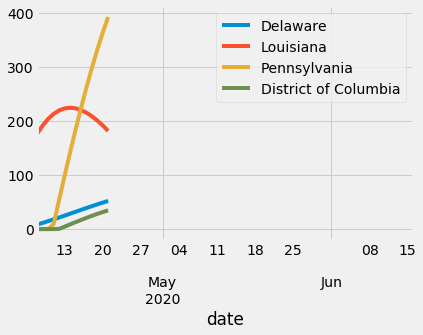

In [43]:
sr1 = pd.read_csv('IHME_data/2020_06_16_eval/Alaska.csv', header=0, index_col=0)['InvVen_mean']
sr1.index = pd.to_datetime(sr1.index)
sr1[sr1>0] = 0
res2 = pd.DataFrame(index=sr1.index)

for i, name in enumerate(ini['State']):
    state_data = pd.read_csv('IHME_data/2020_06_16_eval/' + name + '.csv', header=0, index_col=0)['InvVen_mean']
    state_data.index = pd.to_datetime(state_data.index)
    state_data = state_data[state_data.index <= pd.to_datetime("2020/04/21")]
    for time_slot in range(len(dates)):
        state_data.iloc[14 * time_slot : 14 * (time_slot + 1)] = state_data.iloc[14 * time_slot : 14 * (time_slot + 1)] - sol[time_slot][i]

    state_data[state_data < 0] = 0
    if sum(state_data) > 0:
        res2[name] = state_data
        
    sr1 = state_data + sr1

res2.plot.line()

# GR_adaptive_penalty

In [40]:
dates = ["2020/04/07", "2020/04/21", "2020/05/05", "2020/05/19", "2020/06/02"]
sol = [{} for _ in range(len(dates))]
for i, d in enumerate(dates):
    date = ('_').join(d.split('/'))
    sol_dt = pd.read_csv('results/GR_adaptive_penalty/GR_adaptive_penalty_' + date + '/sol.csv', header=None)
    # date = ('_').join(d.split('/')[1:])
    # sol_dt = pd.read_csv('results/GR_adaptive_pen01/GR_adaptive_pen01_' + date + '/sol.csv', header=None)
    for r in range(sol_dt.shape[0]):
        l = sol_dt.iloc[r, 0].split('(')
        if  l[0] == 's0':
            sol[i][int(l[1].split(')')[0])] = sol_dt.iloc[r, 1]
stock = pd.DataFrame(index=list(ini['State'])+['SNS'])
stock['init'] = list(0.6*ini['Available capacity']) + [7200]
for i in range(len(dates)):
    stock[dates[i]] = [v for k,v in sorted(sol[i].items())]
stock 

,init,2020/04/07,2020/04/21,2020/05/05,2020/05/19,2020/06/02
Alaska,120.0,120.000000,120.000000,120.000000,120.000000,120.000000
Alabama,806.4,806.000000,806.000000,806.000000,806.000000,806.000000
Arkansas,300.0,300.000000,300.000000,300.000000,300.000000,300.000000
Arizona,900.0,900.000000,900.000000,900.000000,900.000000,900.000000
California,6621.6,6621.000000,6621.000000,6621.000000,6621.000000,6621.000000
Colorado,360.0,360.000000,386.038520,360.000000,360.000000,372.803339
Connecticut,600.0,1368.657169,1896.718582,849.277948,722.219619,600.000000
Delaware,240.0,192.000000,192.000000,192.176344,240.000000,240.000000
Florida,2400.0,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
Georgia,603.6,791.318277,661.217330,871.077451,603.000000,603.000000


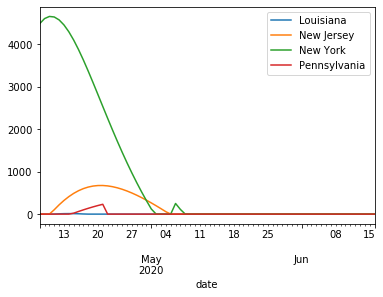

In [41]:
gr_adaptive_penalty = pd.read_csv('IHME_data/2020_06_16_eval/Alaska.csv', header=0, index_col=0)['InvVen_mean']
gr_adaptive_penalty.index = pd.to_datetime(gr_adaptive_penalty.index)
gr_adaptive_penalty[gr_adaptive_penalty>0] = 0
res2 = pd.DataFrame(index=gr_adaptive_penalty.index)

for i, name in enumerate(ini['State']):
    state_data = pd.read_csv('IHME_data/2020_06_16_eval/' + name + '.csv', header=0, index_col=0)['InvVen_mean']
    state_data.index = pd.to_datetime(state_data.index)
    for time_slot in range(5):
        state_data.iloc[14 * time_slot : 14 * (time_slot + 1)] = state_data.iloc[14 * time_slot : 14 * (time_slot + 1)] - sol[time_slot][i]

    state_data[state_data < 0] = 0
    if sum(state_data) > 0:
        res2[name] = state_data
        
    gr_adaptive_penalty = state_data + gr_adaptive_penalty

res2.plot.line()

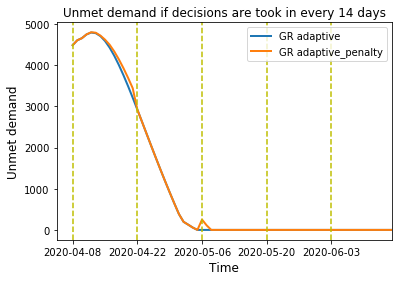

In [42]:
res = pd.DataFrame(index=gr.index)
# res['No action'] = no_action
# res['Deterministic w/o SNS'] = det
# # res['SR w/o SNS'] = sr
# res['Deterministic'] = det1
# res['SR'] = sr1
# res['GR'] = gr
res['GR adaptive'] = gr_adaptive
res['GR adaptive_penalty'] = gr_adaptive_penalty
fig, ax1 = plt.subplots()

# ax2 = ax1.twinx()
# ax2.plot(res.index, demand, linestyle='-.', color='k')
#ax1.plot(res.index, demand, linestyle='-.', color='k')
T = 14
for col in res.columns:
    ax1.plot(res.index, res[col], label=col, linewidth=2)
for i in range(5):  
    ax1.axvline(x=res.index[T*i], color='y', linestyle='--')
    

labels = [res.index[i].date() for i in range(0, T*5, T)]
#ax1.set_xticks(ticks=res.index[range(0, T*5, T)], labels=labels)
ax1.set_xticks(res.index[range(0, T*5, T)])
ax1.set_xticklabels(labels)
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Unmet demand', fontsize=12)
ax1.set_title('Unmet demand if decisions are took in every 14 days')
ax1.set_xlim(right=res.index[5*T - 1])

ax1.legend()
plt.show()

In [38]:
sum(res['GR adaptive'])

77179.02412245853

In [43]:
sum(res['GR adaptive_penalty'])

78520.5759988089

In [ ]:
sum(res['GR adaptive_penalty'])
